<a href="https://colab.research.google.com/github/SiracencoSerghei/linear_algebra/blob/main/3.2_SVD/3.2_4_lowRankApprox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

---
# SVD for low-rank approximations
---

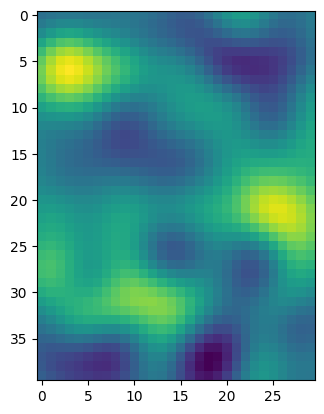

In [5]:
# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

# SVD (remember that V comes out transposed)
U,S,V = np.linalg.svd(A)

plt.imshow(A)
plt.show()

In [9]:
# number of components (singular "layers") to keep
nComps = 5

# reduced matrices
Ur = U[:,0:nComps]
Sr = S[0:nComps]
Vr = V[0:nComps,:]

# low-rank apporoximation
reconImage = Ur@np.diag(Sr)@Vr

# rank (confirm same as nComps)
print( 'rank =',np.linalg.matrix_rank(reconImage) )
print( 'rank =',np.linalg.matrix_rank(A) )

rank = 5
rank = 30


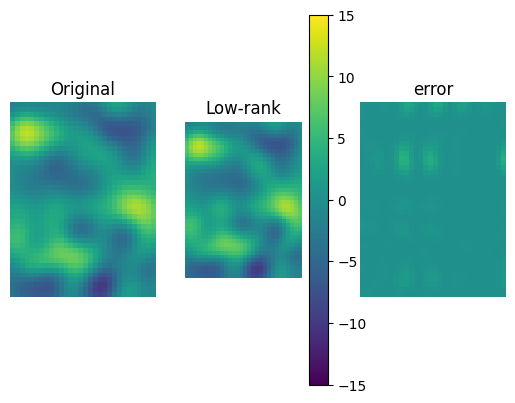

In [13]:
# error map and percent difference from original matrix
errormap = (reconImage-A)**2

# show the results!
plt.subplot(131)
plt.imshow(A,vmin=-15,vmax=15)
plt.axis('off')
plt.title('Original')

plt.subplot(132)
plt.imshow(reconImage,vmin=-15,vmax=15)
plt.colorbar()
plt.axis('off')
plt.title('Low-rank')

plt.subplot(133)
plt.imshow(errormap,vmin=-15,vmax=15)
plt.axis('off')
plt.title('error')
plt.show()